# S07 T01: Tasca del test d'hipòtesis
## Descripció

Aprèn a realitzar test d'hipòtesis amb Python.
## Nivell 1
### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [161]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import pingouin as pg


Ho: Cilindrada mes gran, mes co2.
Ha: Cilindrada mes gran, menys co2.

In [162]:
df=pd.read_csv('diabetes.csv')
df = df.dropna(how='all')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [164]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [166]:
df.groupby('Outcome').size()


Outcome
0    500
1    268
dtype: int64

El numero de diabeticos y no diabeticos esta desequilibrado

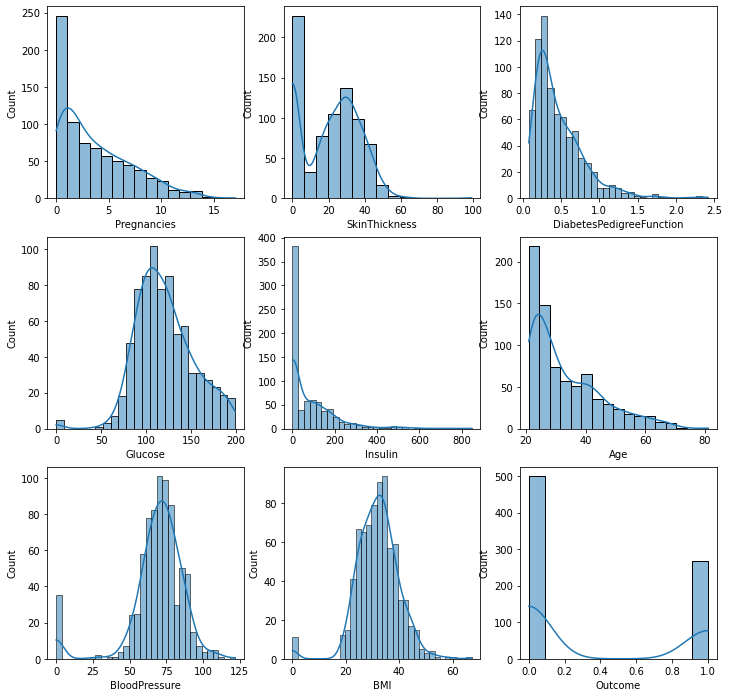

In [167]:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
count=0
for column in df.columns.values:   
    sns.histplot(df[column], kde=True, ax=ax[count%3,int(count/3)])
    count=count+1


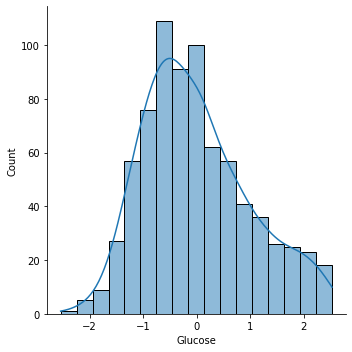

In [168]:
def mean_norm(df):
    return df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_glucose_copy = df_glucose.copy()
sns.displot(mean_norm(df_glucose_copy)["Glucose"], kde=True)


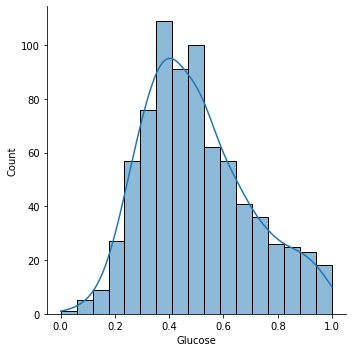

In [169]:
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())
df_glucose_copy = df_glucose.copy()

sns.displot(minmax_norm(df_glucose_copy)["Glucose"], kde=True)

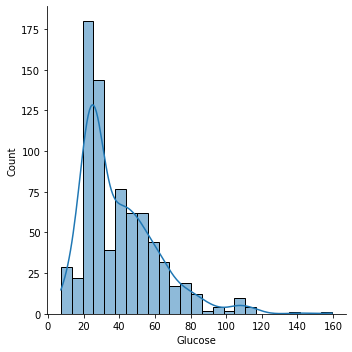

In [170]:

def quantile_norm(df):
    sorted_df = pd.DataFrame(np.sort(df.values,axis=0), index=df.index, columns=df.columns)
    mean_df = sorted_df.mean(axis=1)
    mean_df.index = np.arange(1, len(mean_df) + 1)
    quantile_df =df.rank(method="min").stack().astype(int).map(mean_df).unstack()
    return(quantile_df)

df_glucose_copy = df_glucose.copy()

sns.displot(quantile_norm(df_glucose_copy)["Glucose"], kde=True)

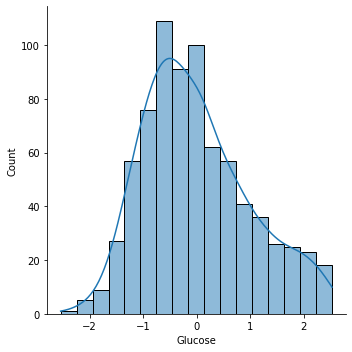

In [171]:
def z_norm(df):
    df_ret=pd.DataFrame()
    for column in df.columns: 
        df_ret[column] = (df[column] - df[column].mean()) / df[column].std()     
    return df_ret
  
df_glucose_copy = df_glucose.copy()
 
sns.displot(z_norm(df_glucose_copy)["Glucose"], kde=True)



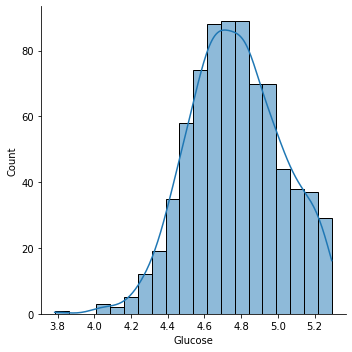

In [172]:
df_glucose_copy = df_glucose.copy()

sns.displot(np.log(df_glucose_copy["Glucose"]), kde=True)


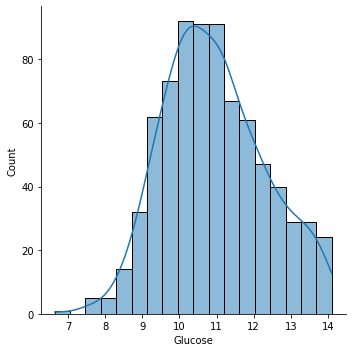

In [173]:
df_glucose_copy = df_glucose.copy()

sns.displot(np.sqrt(df_glucose_copy["Glucose"]), kde=True)

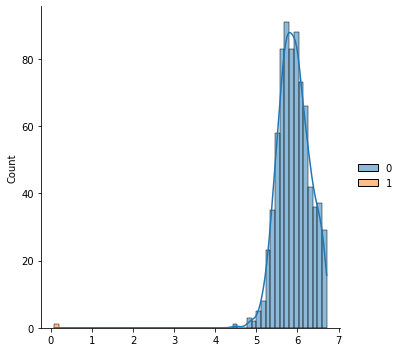

In [174]:
from scipy.stats import yeojohnson
df_glucose_copy = df_glucose.copy()

sns.displot(yeojohnson(df_glucose_copy["Glucose"]), kde=True)


Miramos la normalidad de la distribucion primero con un test grafico Q-Q

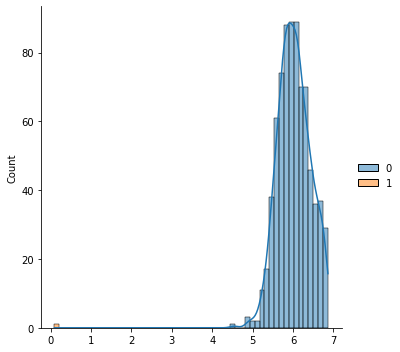

In [175]:
from scipy.stats import boxcox
df_glucose_copy = df_glucose.copy()

sns.displot(boxcox(df_glucose_copy["Glucose"]), kde=True)

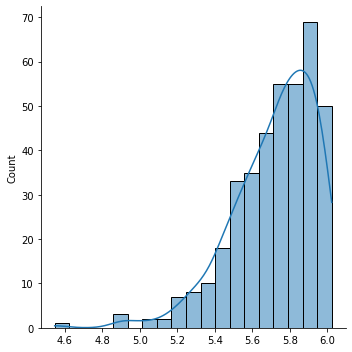

In [176]:
df_glucose_copy = df_glucose.copy()

df_glucose_norm=boxcox(df_glucose_copy["Glucose"])[0]
df_glucose_norm_mean=df_glucose_norm.mean()
sns.displot((df_glucose_norm[df_glucose_norm<df_glucose_norm_mean]), kde=True)



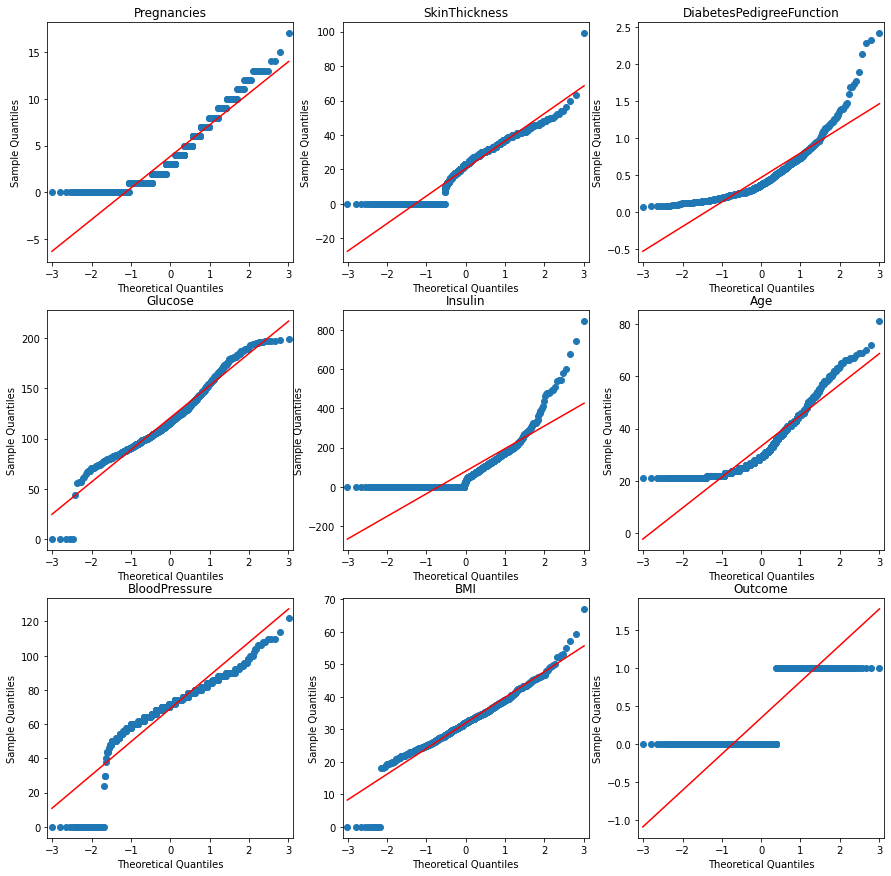

In [177]:
import numpy as np
import pylab
import scipy.stats as stats

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:   
    sm.qqplot(df[column],line='s',ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1
    
 


Parece que la distribuciones se aleja de la normalidad sobretodo en los extremos, como la graficas de barras ya dejaba intuir

Verificamos con un boxplot

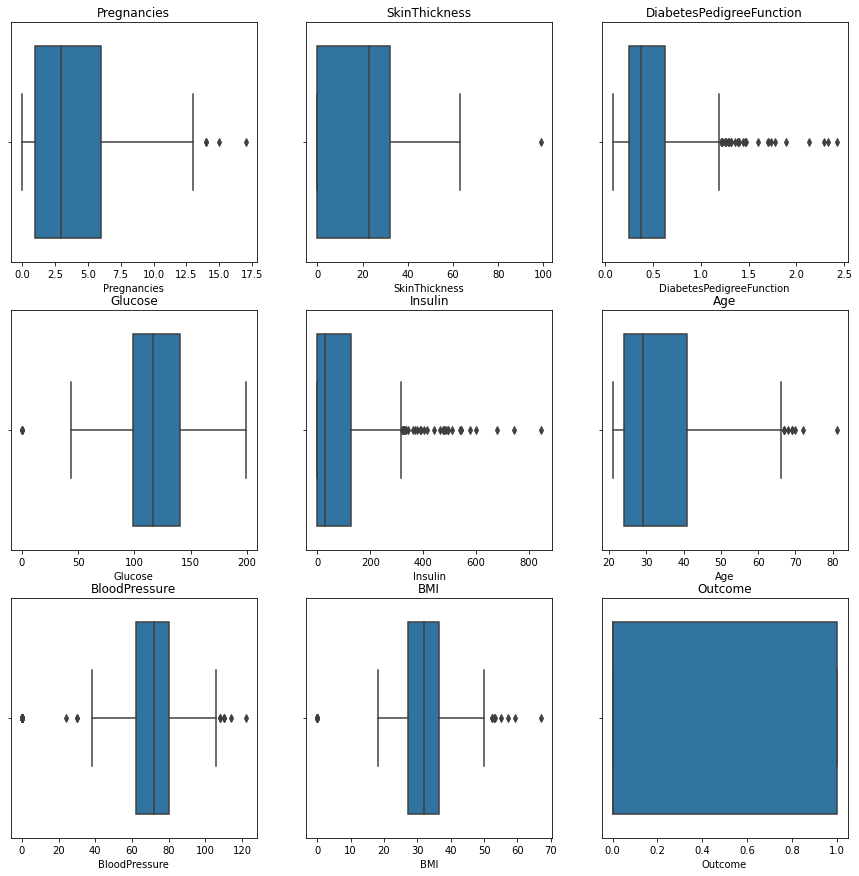

In [178]:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:   
    sns.boxplot(x=df[column],ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1



we delete some imposible values like skin thickness= 0 The range of skin + subcutaneous tissue thickness at abdomen is 2.20-28.05 mm in males and 5.15-27.40 mm in females

In [179]:
df = df[(df.SkinThickness > 2.20) & (df.SkinThickness < 28.05)]
df = df[(df.Insulin > 0)]

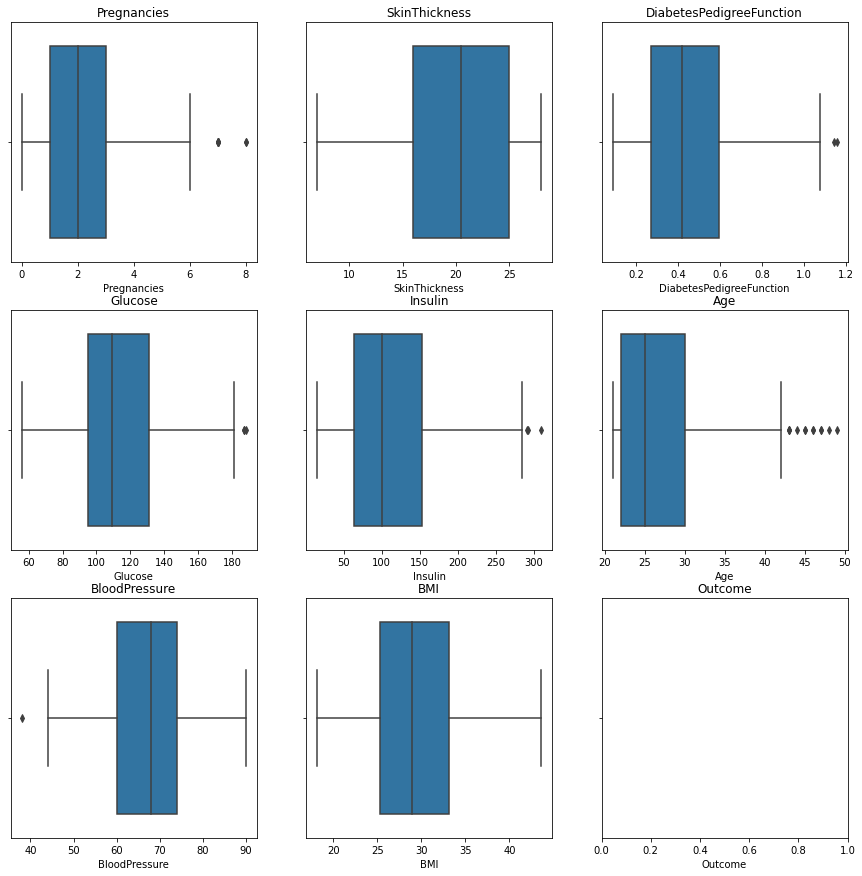

In [180]:
def ouliers_limits(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q_range = q3 - q1
    upper_limit = q3 + 1.5 * q_range
    lower_limit = q1 - 1.5 * q_range
    return upper_limit, lower_limit


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
df_outliers=pd.DataFrame()
for column in df.columns.values:   
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]
    sns.boxplot(x=df_outliers[column],ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1





/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered 

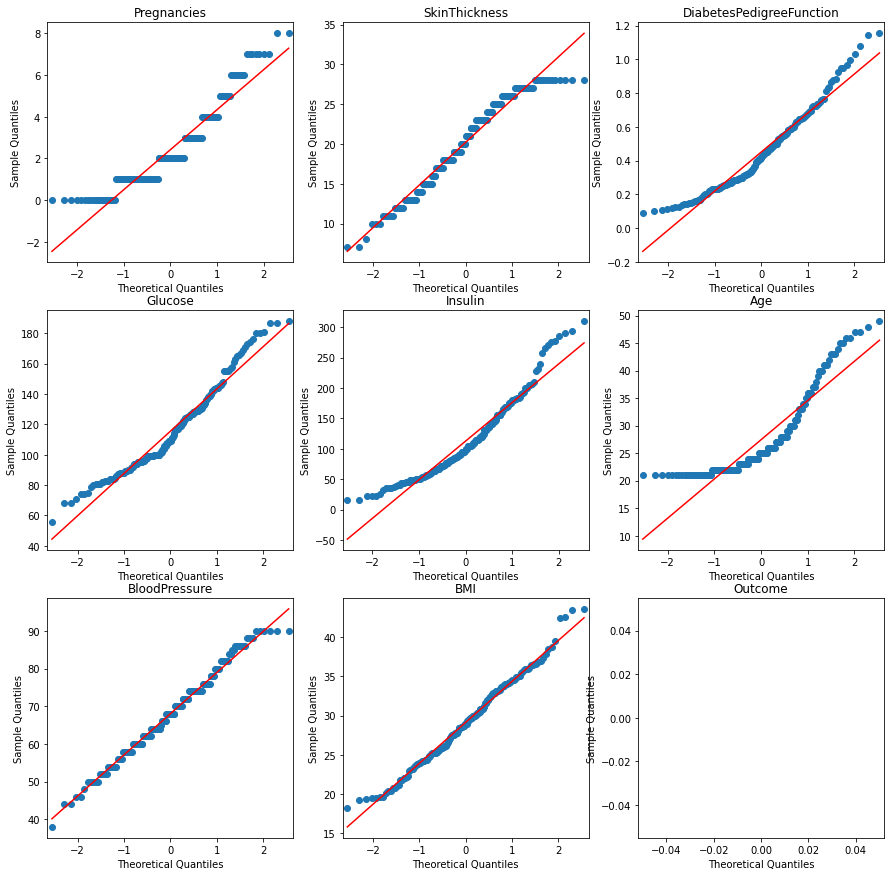

In [181]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]   
    sm.qqplot(df_outliers[column],line='s',ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1

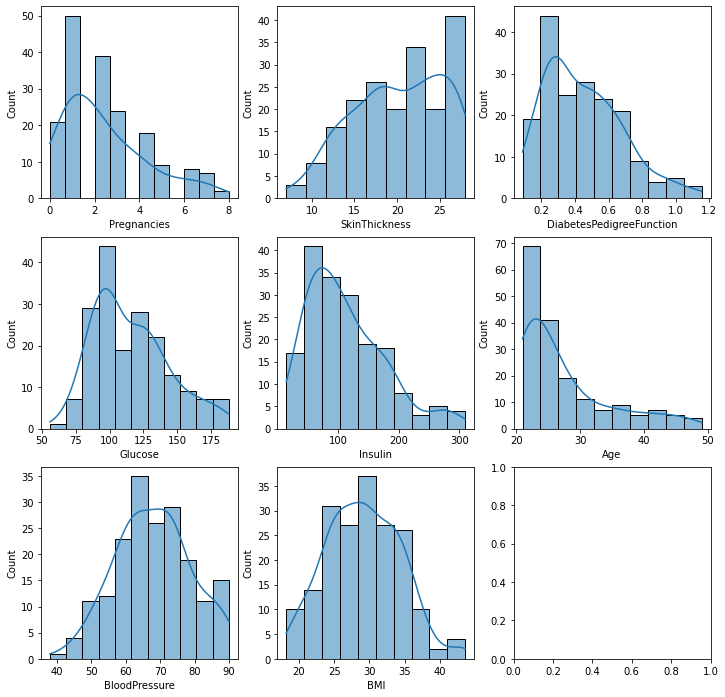

In [182]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
count=0
for column in df.columns.values:  
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]    
    sns.histplot(df_outliers[column], kde=True, ax=ax[count%3,int(count/3)])
    count=count+1

La media no se encuentra centrada asi que habra que normalizar

Pero intentamos ver numericamente con el test de Shapiro el grado de normalida vamos ha hacer la hipotesis de que siuge la distrubucion normal o gausiana

Ho --> la columna sigue una distribucion normal
Ha --> la columna no siguie una distribucion normal

In [183]:
print("Hipotesis nula H0 el factor sigue una distribucion gausiana")
print("Hipotesis alternativa H1 el factor no sigue una distribucion gausiana")
alpha=0.05
df_copy = df.copy()
df_copy.drop(['Outcome'],axis=1,inplace=True)
for column in df_copy.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]    
    stat, p = stats.shapiro(df_outliers[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0')
    else:
           print('se rechaza la hipótesis nula H0')

Hipotesis nula H0 el factor sigue una distribucion gausiana
Hipotesis alternativa H1 el factor no sigue una distribucion gausiana
Pregnancies stats=0.89325,p=0.00000
se rechaza la hipótesis nula H0
Glucose stats=0.95750,p=0.00002
se rechaza la hipótesis nula H0
BloodPressure stats=0.98806,p=0.11924
no se rechaza la hipótesis nula H0
SkinThickness stats=0.95507,p=0.00001
se rechaza la hipótesis nula H0
Insulin stats=0.92983,p=0.00000
se rechaza la hipótesis nula H0
BMI stats=0.98776,p=0.10416
no se rechaza la hipótesis nula H0
DiabetesPedigreeFunction stats=0.94969,p=0.00000
se rechaza la hipótesis nula H0
Age stats=0.81259,p=0.00000
se rechaza la hipótesis nula H0


After clean the dataframe and delete de outlayers we found 2 factors that follow the Gausian distribution BMI and Blood preasure 
we test with k

In [184]:
alpha=0.05
df_copy = df.copy()
df_copy.drop(['Outcome'],axis=1,inplace=True)
for column in df_copy.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df_copy[(df[column] > lower) & (df[column] < upper)]    
    stat,p = stats.normaltest(df_outliers[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)\n')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=21.97148,p=0.00002
se rechaza la hipótesis nula H0)
Glucose stats=11.55552,p=0.00310
se rechaza la hipótesis nula H0)
BloodPressure stats=1.62590,p=0.44355
no se rechaza la hipótesis nula H0)

SkinThickness stats=22.53099,p=0.00001
se rechaza la hipótesis nula H0)
Insulin stats=23.48317,p=0.00001
se rechaza la hipótesis nula H0)
BMI stats=1.98335,p=0.37095
no se rechaza la hipótesis nula H0)

DiabetesPedigreeFunction stats=15.21525,p=0.00050
se rechaza la hipótesis nula H0)
Age stats=40.00718,p=0.00000
se rechaza la hipótesis nula H0)


With the k test we found the same results 
El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

    Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

    Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos. 

In [185]:
def getBestDistributionJona(data):
    dist_names = [
        "norm","invgauss","johnsonsu","cauchy","vonmises_line","cauchy","vonmises_line","exponnorm","hypsecant"
        # "alpha","anglit","arcsine","beta","betaprime","bradford","burr","cauchy","chi","chi2","cosine","dgamma","dweibull","erlang","expon","exponnorm","exponweib","exponpow","f","fatiguelife","fisk","foldcauchy","foldnorm","frechet_r","frechet_l","genlogistic","genpareto","gennorm","genexpon","genextreme","gausshyper","gamma","gengamma","genhalflogistic","gilbrat","gompertz","gumbel_r","gumbel_l","halfcauchy","halflogistic","halfnorm","halfgennorm","hypsecant","invgamma","invgauss","invweibull","johnsonsb","johnsonsu","ksone","kstwobign","laplace","levy","levy_l","levy_stable","logistic","loggamma","loglaplace","lognorm","lomax","maxwell","mielke","nakagami","ncx2","ncf","nct","norm","pareto","pearson3","powerlaw","powerlognorm","powernorm","rdist","reciprocal","rayleigh","rice","recipinvgauss","semicircular","t","triang","truncexpon","truncnorm","tukeylambda","uniform","vonmises","vonmises_line","wald","weibull_min","weibull_max","wrapcauchy"
    ]
    dist_results = []
    params = {}
    for dist_name in dist_names:
      # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
                dist = getattr(stats, dist_name)
                param = dist.fit(data)

                params[dist_name] = param
                # Applying the Kolmogorov-Smirnov test
                D, p = stats.kstest(data, dist_name, args=param)
                print("p value for "+dist_name+" = "+str(p))
                dist_results.append((dist_name, p))
        except Exception:
            pass
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [186]:
#getBestDistributionJona(df['Pregnancies']) ejemplo de uso
def KolmogorovSmirnov(datos):    
    headers=list(datos.columns.values)
    for i in range(0,len(headers)):    
        print(headers[i]) 
        getBestDistributionJona(df[headers[i]])
KolmogorovSmirnov(df)

Pregnancies
p value for norm = 5.949204072730356e-08
p value for invgauss = 0.0006657249313166075
p value for johnsonsu = 0.000984756484469599
p value for cauchy = 1.9362097640205266e-06
p value for vonmises_line = 0.0003211770020540757
p value for cauchy = 1.9362097640205266e-06
p value for vonmises_line = 0.0003211770020540757
p value for exponnorm = 0.002158542459146694
p value for hypsecant = 0.00016133891303147236
Best fitting distribution: exponnorm
Best p value: 0.002158542459146694
Parameters for the best fit: (5.795045038308897, 0.21160942727466625, 0.4702687159634561)
Glucose
p value for norm = 0.02426843777911636
p value for invgauss = 0.29788949470496184
p value for johnsonsu = 0.13838646557664658
p value for cauchy = 0.0023596117707855866
p value for vonmises_line = 1.458620897586601e-15
p value for cauchy = 0.0023596117707855866
p value for vonmises_line = 1.458620897586601e-15
p value for exponnorm = 0.07246904796117337
p value for hypsecant = 0.07302450409981887
Best fi

In [187]:
import pingouin as pg


## Nivell 2

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

miramos la correlacion entre las variables

In [188]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.202187,0.262810,0.178288,0.169683,0.179353,0.085723,0.719128,0.326609
Glucose,0.202187,1.000000,0.200803,0.130870,0.527358,0.226517,0.066069,0.428055,0.503073
BloodPressure,0.262810,0.200803,1.000000,0.093422,0.023069,0.227832,-0.085107,0.394296,0.252704
SkinThickness,0.178288,0.130870,0.093422,1.000000,0.090220,0.482714,0.035015,0.214337,0.223780
Insulin,0.169683,0.527358,0.023069,0.090220,1.000000,0.204543,0.067266,0.361604,0.376626
BMI,0.179353,0.226517,0.227832,0.482714,0.204543,1.000000,-0.047631,0.215675,0.319580
DiabetesPedigreeFunction,0.085723,0.066069,-0.085107,0.035015,0.067266,-0.047631,1.000000,0.159680,0.174866
Age,0.719128,0.428055,0.394296,0.214337,0.361604,0.215675,0.159680,1.000000,0.534533
Outcome,0.326609,0.503073,0.252704,0.223780,0.376626,0.319580,0.174866,0.534533,1.000000


In [197]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='BloodPressure', group='Outcome')

/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/pingouin/distribution.py:218: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats = stats.append(normality(tmp[dv].to_numpy(),
/home/marcr/itacadmyt/Hypothesis-testing/.venv/lib64/python3.10/site-packages/pingouin/distribution.py:218: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats = stats.append(normality(tmp[dv].to_numpy(),


,W,pval,normal
0,0.987219,0.195007,True
1,0.966373,0.235891,True


In [198]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='BloodPressure', group='Outcome')

,W,pval,equal_var
levene,0.085406,0.770422,True


In [203]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
diabetis = df.loc[df.Outcome == 1, 'BloodPressure']
nodiabetis = df.loc[df.Outcome == 0, 'BloodPressure']

stats.ttest_ind(diabetis, nodiabetis)


#pg.ttest(x=nodiabetis, y=diabetis, alternative='two-sided', correction=False)

Ttest_indResult(statistic=3.5811271348310934, pvalue=0.00043553654891820927)

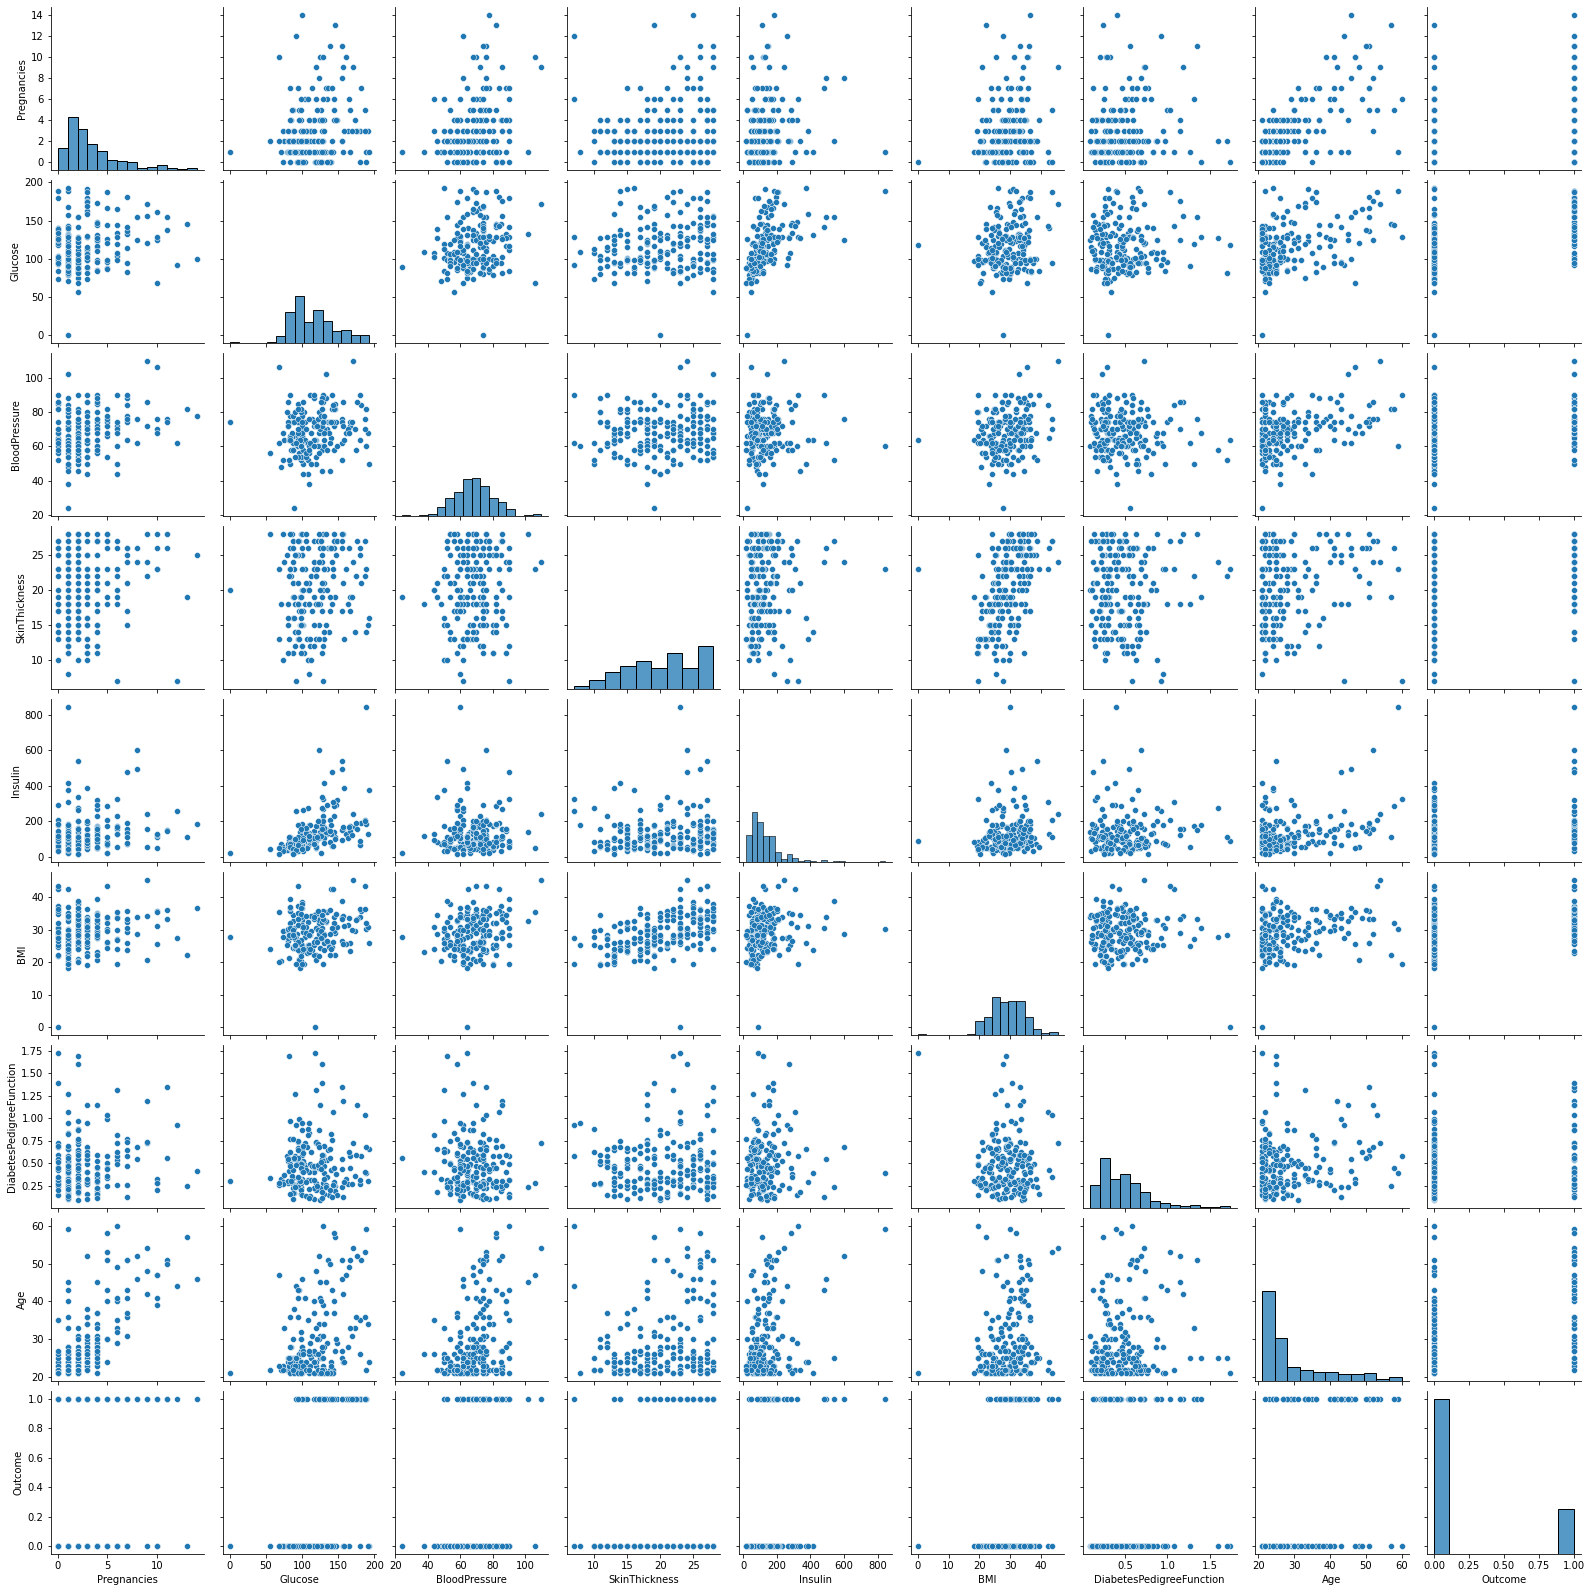

In [190]:


sns.pairplot(df, kind="scatter")

plt.show()

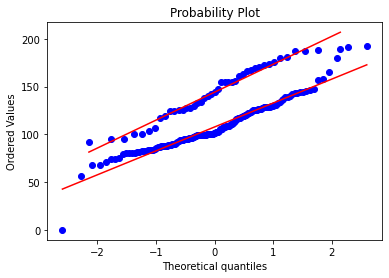

In [191]:
stats.probplot(df[df.Outcome == 1]['Glucose'],dist="norm",plot=pylab)
stats.probplot(df[df.Outcome == 0]['Glucose'],dist="norm",plot=pylab)

pylab.show() 

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

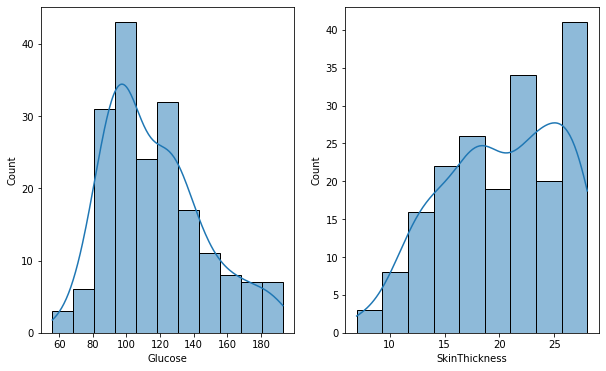

In [192]:
df_clean = df[df.SkinThickness>0]
df_clean = df_clean[df_clean.SkinThickness<60]

df_clean = df_clean[df_clean.Glucose>6]
df_clean = df_clean[df_clean.Glucose<200]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.histplot(df_clean.Glucose, kde=True, ax=ax[0])
sns.histplot(df_clean.SkinThickness, kde=True, ax=ax[1])


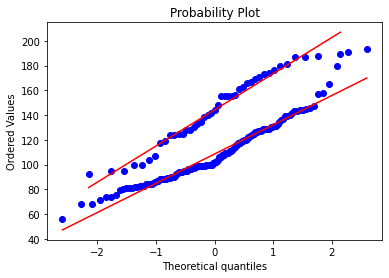

In [193]:
stats.probplot(df_clean[df_clean.Outcome == 1]['Glucose'],dist="norm",plot=pylab)
stats.probplot(df_clean[df_clean.Outcome == 0]['Glucose'],dist="norm",plot=pylab)


pylab.show() 

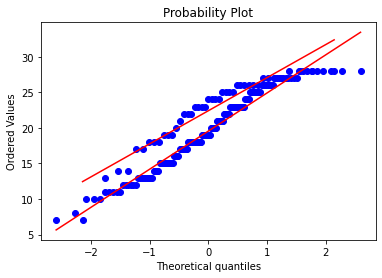

In [194]:
stats.probplot(df_clean[df_clean.Outcome == 1]['SkinThickness'],dist="norm",plot=pylab)
stats.probplot(df_clean[df_clean.Outcome == 0]['SkinThickness'],dist="norm",plot=pylab)
pylab.show() 

In [195]:
for column in df.columns.values:   
    stat,p = stats.normaltest(df[df.Outcome ==1][column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)\n')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=4.17406,p=0.12405
no se rechaza la hipótesis nula H0)

Glucose stats=5.66801,p=0.05878
no se rechaza la hipótesis nula H0)

BloodPressure stats=5.46257,p=0.06514
no se rechaza la hipótesis nula H0)

SkinThickness stats=11.07331,p=0.00394
se rechaza la hipótesis nula H0)
Insulin stats=36.43352,p=0.00000
se rechaza la hipótesis nula H0)
BMI stats=3.19478,p=0.20242
no se rechaza la hipótesis nula H0)

DiabetesPedigreeFunction stats=5.68314,p=0.05833
no se rechaza la hipótesis nula H0)

Age stats=9.73601,p=0.00769
se rechaza la hipótesis nula H0)
Outcome stats=398.50746,p=0.00000
se rechaza la hipótesis nula H0)


Outcome stats=0.89968,p=0.00122
Outcome stats=0.96234,p=0.00047


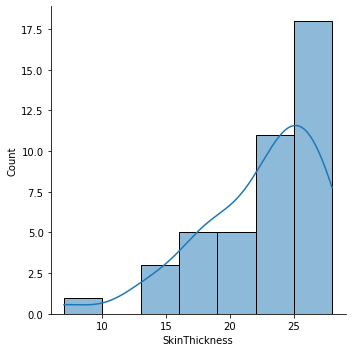

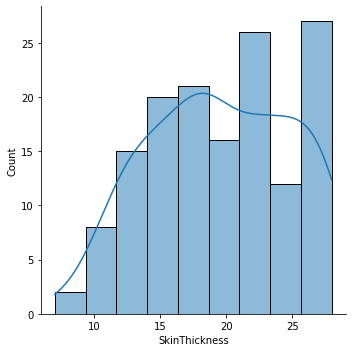

In [196]:
df_clean=df[df.SkinThickness > 0]
df_clean=df_clean[df_clean.SkinThickness < 60]

stat, p = stats.shapiro(df_clean[df_clean.Outcome == 1]['SkinThickness'])
print('%s stats=%.5f,p=%.5f'%(column,stat,p))
stat, p = stats.shapiro(df_clean[df_clean.Outcome == 0]['SkinThickness'])
print('%s stats=%.5f,p=%.5f'%(column,stat,p))

sns.displot(df_clean[df_clean.Outcome == 1]['SkinThickness'],kde=True)
sns.displot(df_clean[df_clean.Outcome == 0]['SkinThickness'],kde=True)

## Nivell 3
## - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.